In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
rc('text', usetex=True)

In [51]:
file_name = {}
for i in np.arange(1, 51, 1):
    mv_prefix = '0.'
    i = str(i)
    i = i.zfill(3)+'000'
    mv = mv_prefix+i

    file_name["mV=%s_NOE_BSM_anu_e_mu_gee.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_anu_e_mu_gee.txt"%mv)
    file_name["mV=%s_NOE_BSM_anu_e_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_anu_e_mu_get.txt"%mv)
    file_name["mV=%s_NOE_BSM_anu_tau_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_anu_tau_mu_get.txt"%mv)
    file_name["mV=%s_NOE_BSM_nu_e_mu_gee.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_nu_e_mu_gee.txt"%mv)
    file_name["mV=%s_NOE_BSM_nu_e_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_nu_e_mu_get.txt"%mv)
    file_name["mV=%s_NOE_BSM_nu_tau_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_nu_tau_mu_get.txt"%mv)
    
    file_name["mV=%s_NOE_SM_anu_e.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_anu_e.txt"%mv)
    file_name["mV=%s_NOE_SM_anu_tau.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_anu_tau.txt"%mv)
    file_name["mV=%s_NOE_SM_nu_e.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_nu_e.txt"%mv)
    file_name["mV=%s_NOE_SM_nu_tau.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_nu_tau.txt"%mv)

In [2]:
n_faser = 200000

In [3]:
def chi2_fig6(SM_anu_e,
             SM_nu_e,
             SM_anu_tau,
             SM_nu_tau,
             NOE_nu_e_gee_BSM_BEST,
             NOE_nu_e_get_BSM_BEST,
             NOE_anu_e_gee_BSM_BEST,
             NOE_anu_e_get_BSM_BEST,
             NOE_nu_tau_get_BSM_BEST,
             NOE_anu_tau_get_BSM_BEST,
             get,
             gee,
             n_faser):
    
    SM_anu_e = n_faser * SM_anu_e
    SM_nu_e = n_faser * SM_nu_e

    SM_anu_tau = n_faser * SM_anu_tau
    SM_nu_tau = n_faser * SM_nu_tau
    

    NOE_nu_e_gee_BSM_BEST = NOE_nu_e_gee_BSM_BEST * n_faser
    NOE_nu_e_get_BSM_BEST = NOE_nu_e_get_BSM_BEST * n_faser
    NOE_anu_e_gee_BSM_BEST = NOE_anu_e_gee_BSM_BEST * n_faser
    NOE_anu_e_get_BSM_BEST = NOE_anu_e_get_BSM_BEST * n_faser
    NOE_nu_tau_get_BSM_BEST = NOE_nu_tau_get_BSM_BEST * n_faser
    NOE_anu_tau_get_BSM_BEST = NOE_anu_tau_get_BSM_BEST * n_faser

    
    # chi nu
    thrd_num = 10
    chi_nu = 0.0
    for i in range(len(SM_nu_e)):
        
        if SM_nu_e[i] !=  0:
            noe_th_e = SM_nu_e[i] + (gee**2)*(NOE_nu_e_gee_BSM_BEST[i]) + (get**2)*(NOE_nu_e_get_BSM_BEST[i])
            noe_exp_e = SM_nu_e[i] + (0.0**2)*(NOE_nu_e_gee_BSM_BEST[i]) + ((0.002)**2)*(NOE_nu_e_get_BSM_BEST[i])           
            if SM_nu_e[i] < thrd_num:
                chi_nu += 2*(noe_th_e - noe_exp_e + noe_exp_e*np.log(noe_exp_e/noe_th_e)) 
            elif SM_nu_e[i] >= thrd_num:
                chi_nu += (noe_th_e - noe_exp_e)*(noe_th_e - noe_exp_e)/(noe_exp_e)
    
        if SM_nu_tau[i] !=  0:
            noe_th_tau = SM_nu_tau[i] + (get**2)*(NOE_nu_tau_get_BSM_BEST[i])
            noe_exp_tau = SM_nu_tau[i] + ((0.002)**2)*(NOE_nu_tau_get_BSM_BEST[i])
                      
            if SM_nu_tau[i] < thrd_num:
                chi_nu += 2*(noe_th_tau - noe_exp_tau + noe_exp_tau*np.log(noe_exp_tau/noe_th_tau)) 
            elif SM_nu_tau[i] >= thrd_num:
                chi_nu += (noe_th_tau - noe_exp_tau)*(noe_th_tau - noe_exp_tau)/(noe_exp_tau)                
          
     
    # chi anu
    chi_anu = 0.0
    for i in range(len(SM_anu_e)): 

        if SM_anu_e[i] !=  0:
            noe_th_e = SM_anu_e[i] + (gee**2)*(NOE_anu_e_gee_BSM_BEST[i]) + (get**2)*(NOE_anu_e_get_BSM_BEST[i])
            noe_exp_e = SM_anu_e[i] + (0.0**2)*(NOE_anu_e_gee_BSM_BEST[i]) + ((0.002)**2)*(NOE_anu_e_get_BSM_BEST[i]) 
            
            if SM_anu_e[i] < thrd_num:
                chi_anu += 2*(noe_th_e - noe_exp_e + noe_exp_e*np.log(noe_exp_e/noe_th_e)) 
            elif SM_anu_e[i] >= thrd_num:
                chi_anu += (noe_th_e - noe_exp_e)*(noe_th_e - noe_exp_e)/(noe_exp_e)
    
        if SM_anu_tau[i] !=  0:
            noe_th_tau = SM_anu_tau[i] + (get**2)*(NOE_anu_tau_get_BSM_BEST[i])
            noe_exp_tau = SM_anu_tau[i] + ((0.002)**2)*(NOE_anu_tau_get_BSM_BEST[i])
                      
            if SM_anu_tau[i] < thrd_num:
                chi_anu += 2*(noe_th_tau - noe_exp_tau + noe_exp_tau*np.log(noe_exp_tau/noe_th_tau)) 
            elif SM_anu_tau[i] >= thrd_num:
                chi_anu += (noe_th_tau - noe_exp_tau)*(noe_th_tau - noe_exp_tau)/(noe_exp_tau)    

                
    return chi_anu + chi_nu

In [4]:
output = './output/'

chi2getgee = []
chi2getgee_getsgees = []

gees = np.linspace(0,5,100)*1e-3
gets = np.linspace(0,5,100)*1e-3


number = '0.010'+'000'

NOE_nu_e_gee_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_e_mu_gee.txt"%number)
NOE_nu_e_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number)
NOE_anu_e_gee_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_e_mu_gee.txt"%number)
NOE_anu_e_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number)
NOE_nu_tau_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number)
NOE_anu_tau_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number)

for get in gets:
    for gee in gees:    
        SM_anu_e_path = output + "mV=%s_NOE_SM_anu_e.txt"%number
        SM_anu_tau_path = output + "mV=%s_NOE_SM_anu_tau.txt"%number

        SM_nu_e_path = output + "mV=%s_NOE_SM_nu_e.txt"%number
        SM_nu_tau_path = output + "mV=%s_NOE_SM_nu_tau.txt"%number
             
        SM_anu_tau = np.loadtxt(SM_anu_tau_path)
        SM_nu_tau = np.loadtxt(SM_nu_tau_path)

        SM_anu_e = np.loadtxt(SM_anu_e_path)
        SM_nu_e = np.loadtxt(SM_nu_e_path)        
        
        chi2getgee_getsgees.append(chi2_fig6(SM_anu_e, SM_nu_e, SM_anu_tau, SM_nu_tau,
                                             NOE_nu_e_gee_BSM_BEST, NOE_nu_e_get_BSM_BEST,
                                             NOE_anu_e_gee_BSM_BEST, NOE_anu_e_get_BSM_BEST,
                                             NOE_nu_tau_get_BSM_BEST, NOE_anu_tau_get_BSM_BEST,
                                             get, gee, n_faser))
    chi2getgee.append(chi2getgee_getsgees)
    chi2getgee_getsgees = []

In [5]:
chi2getgee = np.array(chi2getgee)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


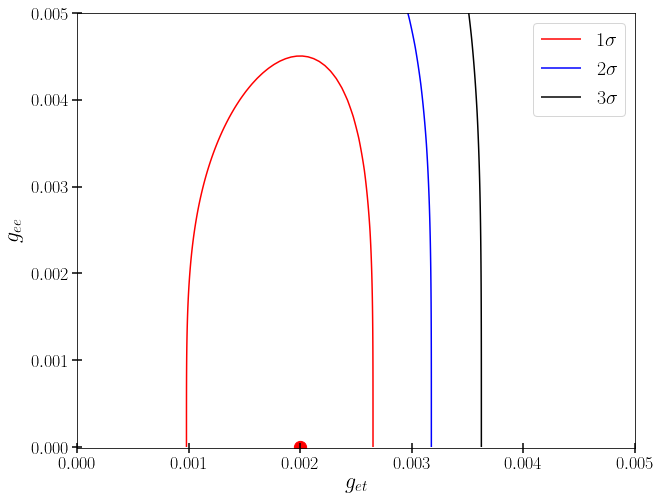

In [7]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))



gees = np.linspace(0,5,100)*1e-3
gets = np.linspace(0,5,100)*1e-3

y , x = np.meshgrid(gees, gets)
CS = ax.contour(x, y , chi2getgee, colors = list('rbk'), levels =  [1,4,9]) 

labels = [r'1$\sigma$', r'2$\sigma$',r'3$\sigma$']
for i in range(len(labels)):
    ax.collections[i].set_label(labels[i])
    
plt.legend(loc= 0, frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$g_{et}$", fontsize = label_size)
ax.set_ylabel(r"$g_{ee}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
    
ax.set_ylim(-0.00001)

ax.scatter(0.002, 0.0, marker = 'o', s = 150, c = 'r')

plt.savefig("./fig6b_n_faser=%s.pdf"%str(n_faser))

# CCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

In [8]:
def chi2_fig6c(SM_anu_e,
             SM_nu_e,
             SM_anu_tau,
             SM_nu_tau,
             NOE_nu_e_gee_BSM_BEST,
             NOE_nu_e_get_BSM_BEST,
             NOE_anu_e_gee_BSM_BEST,
             NOE_anu_e_get_BSM_BEST,
             NOE_nu_tau_get_BSM_BEST,
             NOE_anu_tau_get_BSM_BEST,
             get,
             gee,
             n_faser):
    
    SM_anu_e = n_faser * SM_anu_e
    SM_nu_e = n_faser * SM_nu_e

    SM_anu_tau = n_faser * SM_anu_tau
    SM_nu_tau = n_faser * SM_nu_tau
    

    NOE_nu_e_gee_BSM_BEST = NOE_nu_e_gee_BSM_BEST * n_faser
    NOE_nu_e_get_BSM_BEST = NOE_nu_e_get_BSM_BEST * n_faser
    NOE_anu_e_gee_BSM_BEST = NOE_anu_e_gee_BSM_BEST * n_faser
    NOE_anu_e_get_BSM_BEST = NOE_anu_e_get_BSM_BEST * n_faser
    NOE_nu_tau_get_BSM_BEST = NOE_nu_tau_get_BSM_BEST * n_faser
    NOE_anu_tau_get_BSM_BEST = NOE_anu_tau_get_BSM_BEST * n_faser

    
    # chi nu
    thrd_num = 10
    chi_nu = 0.0
    for i in range(len(SM_nu_e)):
        
        if SM_nu_e[i] !=  0:
            noe_th_e = SM_nu_e[i] + (gee**2)*(NOE_nu_e_gee_BSM_BEST[i]) + (get**2)*(NOE_nu_e_get_BSM_BEST[i])
            noe_exp_e = SM_nu_e[i] + ((0.001*np.sqrt(2))**2)*(NOE_nu_e_gee_BSM_BEST[i]) + ((0.001*np.sqrt(2))**2)*(NOE_nu_e_get_BSM_BEST[i])           
            if SM_nu_e[i] < thrd_num:
                chi_nu += 2*(noe_th_e - noe_exp_e + noe_exp_e*np.log(noe_exp_e/noe_th_e)) 
            elif SM_nu_e[i] >= thrd_num:
                chi_nu += (noe_th_e - noe_exp_e)*(noe_th_e - noe_exp_e)/(noe_exp_e)
    
        if SM_nu_tau[i] !=  0:
            noe_th_tau = SM_nu_tau[i] + (get**2)*(NOE_nu_tau_get_BSM_BEST[i])
            noe_exp_tau = SM_nu_tau[i] + ((0.001*np.sqrt(2))**2)*(NOE_nu_tau_get_BSM_BEST[i])
                      
            if SM_nu_tau[i] < thrd_num:
                chi_nu += 2*(noe_th_tau - noe_exp_tau + noe_exp_tau*np.log(noe_exp_tau/noe_th_tau)) 
            elif SM_nu_tau[i] >= thrd_num:
                chi_nu += (noe_th_tau - noe_exp_tau)*(noe_th_tau - noe_exp_tau)/(noe_exp_tau)                
          
     
    # chi anu
    chi_anu = 0.0
    for i in range(len(SM_anu_e)): 

        if SM_anu_e[i] !=  0:
            noe_th_e = SM_anu_e[i] + (gee**2)*(NOE_anu_e_gee_BSM_BEST[i]) + (get**2)*(NOE_anu_e_get_BSM_BEST[i])
            noe_exp_e = SM_anu_e[i] + ((0.001*np.sqrt(2))**2)*(NOE_anu_e_gee_BSM_BEST[i]) + ((0.001*np.sqrt(2))**2)*(NOE_anu_e_get_BSM_BEST[i])           
            if SM_anu_e[i] < thrd_num:
                chi_anu += 2*(noe_th_e - noe_exp_e + noe_exp_e*np.log(noe_exp_e/noe_th_e)) 
            elif SM_anu_e[i] >= thrd_num:
                chi_anu += (noe_th_e - noe_exp_e)*(noe_th_e - noe_exp_e)/(noe_exp_e)
    
        if SM_anu_tau[i] !=  0:
            noe_th_tau = SM_anu_tau[i] + (get**2)*(NOE_anu_tau_get_BSM_BEST[i])
            noe_exp_tau = SM_anu_tau[i] + ((0.001*np.sqrt(2))**2)*(NOE_anu_tau_get_BSM_BEST[i])
                      
            if SM_anu_tau[i] < thrd_num:
                chi_anu += 2*(noe_th_tau - noe_exp_tau + noe_exp_tau*np.log(noe_exp_tau/noe_th_tau)) 
            elif SM_anu_tau[i] >= thrd_num:
                chi_anu += (noe_th_tau - noe_exp_tau)*(noe_th_tau - noe_exp_tau)/(noe_exp_tau)      

                
    return chi_anu + chi_nu

In [9]:
output = './output/'

chi2getgee = []
chi2getgee_getsgees = []

gees = np.linspace(0,5,100)*1e-3
gets = np.linspace(0,5,100)*1e-3


number = '0.010'+'000'

NOE_nu_e_gee_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_e_mu_gee.txt"%number)
NOE_nu_e_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number)
NOE_anu_e_gee_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_e_mu_gee.txt"%number)
NOE_anu_e_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number)
NOE_nu_tau_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number)
NOE_anu_tau_get_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number)

for get in gets:
    for gee in gees:    
        SM_anu_e_path = output + "mV=%s_NOE_SM_anu_e.txt"%number
        SM_anu_tau_path = output + "mV=%s_NOE_SM_anu_tau.txt"%number

        SM_nu_e_path = output + "mV=%s_NOE_SM_nu_e.txt"%number
        SM_nu_tau_path = output + "mV=%s_NOE_SM_nu_tau.txt"%number
             
        SM_anu_tau = np.loadtxt(SM_anu_tau_path)
        SM_nu_tau = np.loadtxt(SM_nu_tau_path)

        SM_anu_e = np.loadtxt(SM_anu_e_path)
        SM_nu_e = np.loadtxt(SM_nu_e_path)        
        
        chi2getgee_getsgees.append(chi2_fig6c(SM_anu_e, SM_nu_e, SM_anu_tau, SM_nu_tau,
                                             NOE_nu_e_gee_BSM_BEST, NOE_nu_e_get_BSM_BEST,
                                             NOE_anu_e_gee_BSM_BEST, NOE_anu_e_get_BSM_BEST,
                                             NOE_nu_tau_get_BSM_BEST, NOE_anu_tau_get_BSM_BEST,
                                             get, gee, n_faser))
    chi2getgee.append(chi2getgee_getsgees)
    chi2getgee_getsgees = []

In [10]:
chi2getgee = np.array(chi2getgee)

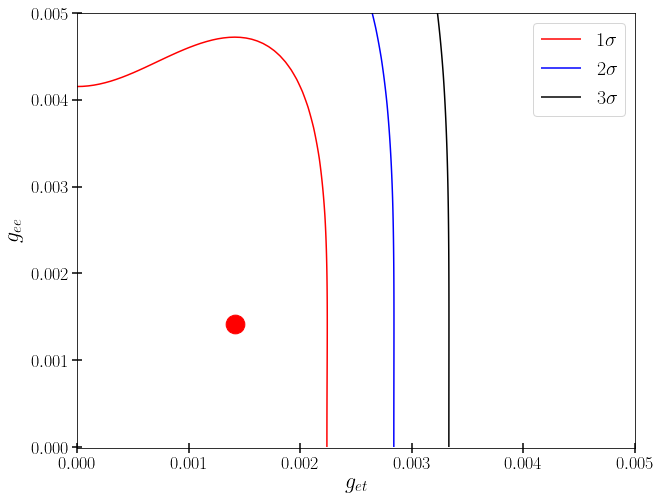

In [11]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))



gees = np.linspace(0,5,100)*1e-3
gets = np.linspace(0,5,100)*1e-3

y , x = np.meshgrid(gees, gets)
CS = ax.contour(x, y , chi2getgee, colors = list('rbk'), levels =  [1,4,9]) 

labels = [r'1$\sigma$', r'2$\sigma$',r'3$\sigma$']
for i in range(len(labels)):
    ax.collections[i].set_label(labels[i])
    
plt.legend(loc= 0, frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$g_{et}$", fontsize = label_size)
ax.set_ylabel(r"$g_{ee}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
    
ax.set_ylim(-0.00001)
ax.set_xlim(0.00)
ax.scatter((0.001*np.sqrt(2)), (0.001*np.sqrt(2)), marker = 'o', s = 350, c = 'r')

plt.savefig("./fig6c_n_faser=%s.pdf"%str(n_faser))

In [61]:
(0.001*np.sqrt(2))**2

2.0000000000000008e-06